<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/BinaryTextClassificationWithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [145]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [146]:
np.random.seed(0)
tf.random.set_seed(0)

In [147]:
df = pd.read_csv('AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [148]:
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

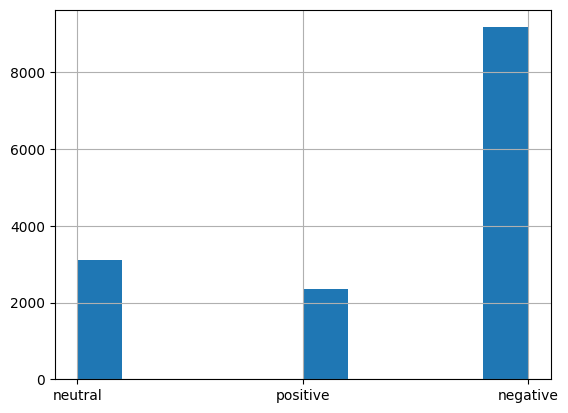

In [149]:
df['airline_sentiment'].hist()

In [150]:
# we solve binary classification so we take only 2
df = df[df['airline_sentiment'] != 'neutral'].copy()
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


<Axes: >

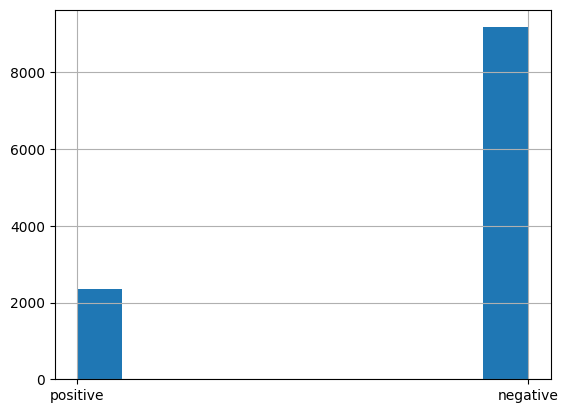

In [151]:
df['airline_sentiment'].hist()

In [152]:
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [153]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [154]:
# format tha data
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [155]:
# input dimensions
D = X_train.shape[1]
print('Input dimension', D)

Input dimension 2000


In [156]:
# initialize loss function and optimizer
loss_fn = BinaryCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=0.1)

In [157]:
# initialize model
model = Model()

In [158]:
# define input layer
i = Input(shape=(D,))
x = Dense(1)(i) # activation='sigmoid' included in the loss function
model = Model(i, x)

In [159]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           2,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
model.compile(
    loss = loss_fn,
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [161]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 32)

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8518 - loss: 0.3370 - val_accuracy: 0.9177 - val_loss: 0.2156
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9314 - loss: 0.1635 - val_accuracy: 0.9134 - val_loss: 0.2339
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9420 - loss: 0.1396 - val_accuracy: 0.9104 - val_loss: 0.2556
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.1267 - val_accuracy: 0.9047 - val_loss: 0.2768
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1182 - val_accuracy: 0.9043 - val_loss: 0.2974
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9561 - loss: 0.1120 - val_accuracy: 0.9030 - val_loss: 0.3172
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1072 - val_accuracy: 0.9008 - val_loss: 0.3364
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9617 - loss: 0.1033 - val_accuracy: 0.

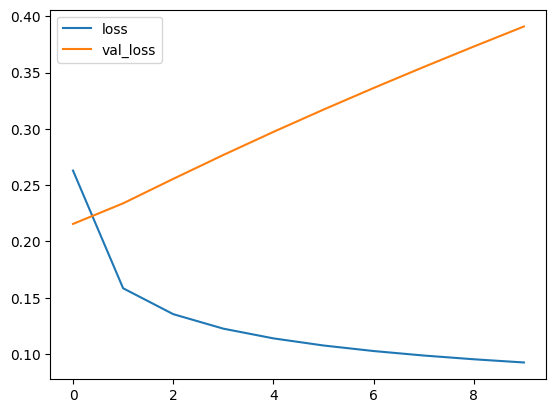

In [162]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

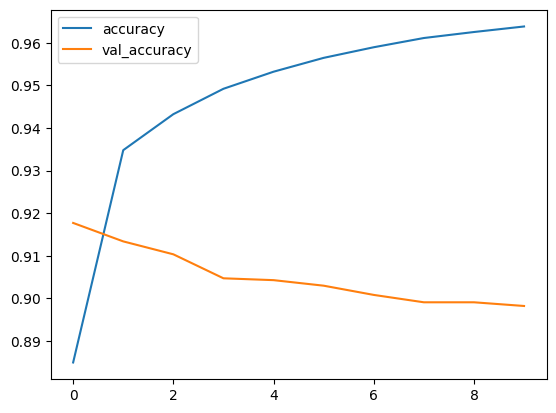

In [163]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [164]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [165]:
cm = confusion_matrix(y_train, P_train, normalize='true')
cm

array([[0.99207217, 0.00792783],
       [0.07463466, 0.92536534]])

In [166]:
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cmap='Blues')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

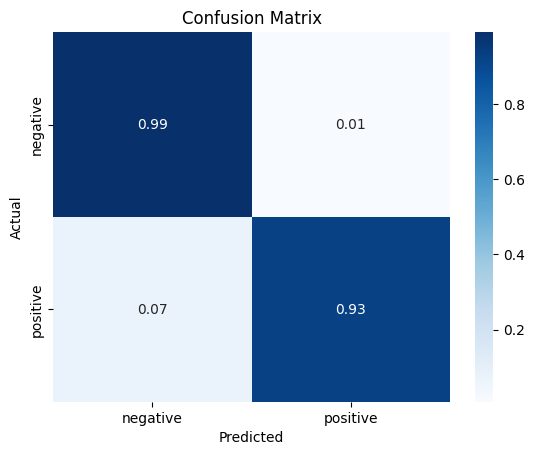

In [167]:
plot_cm(cm)

In [168]:
cm_test = confusion_matrix(y_test, P_test, normalize='true')
cm_test

array([[0.94522019, 0.05477981],
       [0.31319911, 0.68680089]])

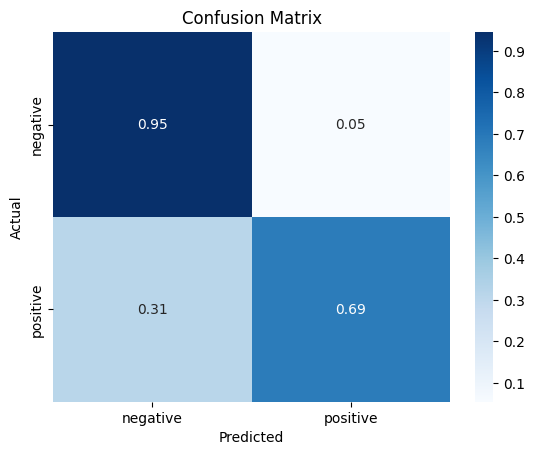

In [169]:
plot_cm(cm_test)

In [170]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print('Train AUC', roc_auc_score(y_train, Pr_train))
print('Test AUC', roc_auc_score(y_test, Pr_test))

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train AUC 0.9956519927724403
Test AUC 0.9222426872550503


In [171]:
print('Train F1', f1_score(y_train, P_train))
print('Test F1', f1_score(y_test, P_test))

Train F1 0.9463570856685348
Test F1 0.7172897196261683


In [172]:
model.layers

[<InputLayer name=input_layer_9, built=True>, <Dense name=dense_8, built=True>]

In [173]:
model.layers[1].get_weights()

[array([[-14.067247 ],
        [  6.129198 ],
        [ -1.7595292],
        ...,
        [  4.9836407],
        [ -5.2703376],
        [  0.7948299]], dtype=float32),
 array([-1.3959897], dtype=float32)]

In [180]:
w = model.layers[1].get_weights()[0]

In [178]:
word_index_map = vectorizer.vocabulary_

In [183]:
# let's look at the weights for each words
threshold = 2

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
  weight = w[index, 0]
  if weight > threshold:
    word_weight_tuples.append((word, weight))
word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for word, weight in word_weight_tuples[:10]:
  print(f'{word}: {weight}')

Most positive words:
excellent: 18.982833862304688
thank: 18.9808292388916
kudos: 18.76690673828125
worries: 18.21139907836914
deals: 16.311384201049805
thanks: 15.937458992004395
exceptional: 15.088497161865234
great: 13.78943157196045
awesome: 13.242178916931152
hot: 12.56981086730957


In [184]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
  weight = w[index, 0]
  if weight < -threshold:
    word_weight_tuples.append((word, weight))


word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for word, weight in word_weight_tuples[:10]:
  print(f'{word}: {weight}')

Most negative words:
worst: -22.910720825195312
rude: -19.62042236328125
paid: -18.59627914428711
list: -18.17030906677246
worse: -16.977996826171875
text: -16.90338897705078
epicfail: -16.901628494262695
disappointed: -16.879854202270508
flightation: -16.60711669921875
hr: -16.217464447021484
